<a href="https://colab.research.google.com/github/PuspanjaliMuduli17/Projects/blob/main/swiggy_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Problem Statements
Food industries are having important reflection of the economy from past few decades. In this project, we are analyzing the various aspects with different use cases which covers many aspects of Swiggy Food Delivery Service. It helps in not only understanding the meaningful relationships between attributes, but it also allows us to do our own research and come-up with our findings.

##Analysis of the following is performed in this Project:

- Distribution of 'Rating'.
- Area-wise Analysis in terms of 'Rating' and 'Cost_for_Two (₹)' on BTM, HSR, & Koramangala Area.
- Analyse "Approx Cost of 2 People" vs "Rating". Find out the relationship between them.
- Analyze Affordable/Budgeted and Highest Rated Restaurants of Bangalore.
- Top 15 Cheapest & Highest Rated Restaurants with Approx. Cost for 2 People.
- Top 15 Expensive & Highest Rated Restaurants with Approx. Cost for 2 People.
- Area-wise Cuisines Analysis & Distribution of Cuisines in BTM, HSR, & Koramangala (Bangalore) Restaurants.
- Most preferred Cuisines by the Customers.

## Importing Standard Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings(action = 'ignore')

## Read data

In [ ]:
df_Swiggy = pd.read_csv('/content/Swiggy Bangalore Outlet Details.csv', sep = ',')
df_Swiggy

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two
0,Kanti Sweets,Sweets,"Koramangala, Koramangala",4.3,₹ 150
1,Mumbai Tiffin,"North Indian, Home Food, Thalis, Combo","Sector 5, HSR",4.4,₹ 400
2,Sri Krishna sagar,"South Indian, North Indian, Fast Food, Beverag...","6th Block, Koramangala",4.1,₹ 126
3,Al Daaz,"American, Arabian, Chinese, Desserts, Fast Foo...","HSR, HSR",4.4,₹ 400
4,Beijing Bites,"Chinese, Thai","5th Block, Koramangala",4.1,₹ 450
...,...,...,...,...,...
113,Wok Paper Scissors,"Pan-Asian, Chinese, Asian","JNC Road, Koramangala",3.9,₹ 219
114,Savoury Restaurant,"Arabian, Middle Eastern, North Indian, Grill, ...","Madiwala, BTM",4.1,₹ 600
115,Royal Treat,"North Indian, Chinese, Seafood, Biryani","5th block Koramangala, Koramangala",4.2,₹ 193
116,Thali 99,North Indian,"Koramangala, Koramangala",4.3,₹ 200


In [ ]:
# how many features are there in datasets
df_Swiggy.columns

Index(['Shop_Name', 'Cuisine', 'Location', 'Rating', 'Cost_for_Two'], dtype='object')

In [ ]:
# check for missing values in dataset
df_Swiggy.isnull().sum()

Shop_Name       0
Cuisine         0
Location        0
Rating          0
Cost_for_Two    0
dtype: int64

In [ ]:
df_Swiggy.describe()

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two
count,118,118,118,118,118
unique,115,79,65,13,30
top,La Pino'z Pizza,North Indian,"BTM, BTM",4.1,₹ 300
freq,2,12,13,30,16


In [ ]:
df_Swiggy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Shop_Name     118 non-null    object
 1   Cuisine       118 non-null    object
 2   Location      118 non-null    object
 3   Rating        118 non-null    object
 4   Cost_for_Two  118 non-null    object
dtypes: object(5)
memory usage: 4.7+ KB


## Data Pre-Processing & Cleaning

In [ ]:
df_Swiggy.duplicated().sum()

0

In [ ]:
df_Swiggy.head()

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two
0,Kanti Sweets,Sweets,"Koramangala, Koramangala",4.3,₹ 150
1,Mumbai Tiffin,"North Indian, Home Food, Thalis, Combo","Sector 5, HSR",4.4,₹ 400
2,Sri Krishna sagar,"South Indian, North Indian, Fast Food, Beverag...","6th Block, Koramangala",4.1,₹ 126
3,Al Daaz,"American, Arabian, Chinese, Desserts, Fast Foo...","HSR, HSR",4.4,₹ 400
4,Beijing Bites,"Chinese, Thai","5th Block, Koramangala",4.1,₹ 450


In [ ]:
# how many different ratings are in dataset
df_Swiggy['Rating'].unique()

array(['4.3', '4.4', '4.1', '4.2', '3.9', '3.8', '4', '3.7', '3.6', '4.8',
       '4.5', '4.6', '--'], dtype=object)

In [ ]:
# Replacing '--' rating with zero(0)
df_Swiggy['Rating'] = df_Swiggy['Rating'].str.replace('--', '0').astype(float)

In [ ]:
# How many unique entries for 'Cost_for_Two' feature
df_Swiggy['Cost_for_Two'].unique()

array(['₹ 150', '₹ 400', '₹ 126', '₹ 450', '₹ 350', '₹ 200', '₹ 500',
       '₹ 247', '₹ 550', '₹ 300', '₹ 129', '₹ 250', '₹ 268', '₹ 600',
       '₹ 527', '₹ 130', '₹ 257', '₹ 280', '₹ 399', '₹ 220', '₹ 800',
       '₹ 100', '₹ 178', '₹ 120', '₹ 251', '₹ 650', '₹ 132', '₹ 153',
       '₹ 219', '₹ 193'], dtype=object)

In [ ]:
# Removing the rupees symbol (₹) from the Cost_for_Two
df_Swiggy['Cost_for_Two'] = df_Swiggy['Cost_for_Two'].apply(lambda string: string.split(' ')[1]).astype(int)

In [ ]:
df_Swiggy.head()

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two
0,Kanti Sweets,Sweets,"Koramangala, Koramangala",4.3,150
1,Mumbai Tiffin,"North Indian, Home Food, Thalis, Combo","Sector 5, HSR",4.4,400
2,Sri Krishna sagar,"South Indian, North Indian, Fast Food, Beverag...","6th Block, Koramangala",4.1,126
3,Al Daaz,"American, Arabian, Chinese, Desserts, Fast Foo...","HSR, HSR",4.4,400
4,Beijing Bites,"Chinese, Thai","5th Block, Koramangala",4.1,450


In [ ]:
df_Swiggy['Cost_for_Two'].unique()

array([150, 400, 126, 450, 350, 200, 500, 247, 550, 300, 129, 250, 268,
       600, 527, 130, 257, 280, 399, 220, 800, 100, 178, 120, 251, 650,
       132, 153, 219, 193])

In [ ]:
# Renaming the feature Cost_for_Two
df_Swiggy.rename(columns = {'Cost_for_Two' : 'Cost_for_Two (₹)'}, inplace = True)

In [ ]:
df_Swiggy.head()

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two (₹)
0,Kanti Sweets,Sweets,"Koramangala, Koramangala",4.3,150
1,Mumbai Tiffin,"North Indian, Home Food, Thalis, Combo","Sector 5, HSR",4.4,400
2,Sri Krishna sagar,"South Indian, North Indian, Fast Food, Beverag...","6th Block, Koramangala",4.1,126
3,Al Daaz,"American, Arabian, Chinese, Desserts, Fast Foo...","HSR, HSR",4.4,400
4,Beijing Bites,"Chinese, Thai","5th Block, Koramangala",4.1,450


In [ ]:
df_Swiggy.dtypes

Shop_Name            object
Cuisine              object
Location             object
Rating              float64
Cost_for_Two (₹)      int64
dtype: object

In [ ]:
df_Swiggy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Shop_Name         118 non-null    object 
 1   Cuisine           118 non-null    object 
 2   Location          118 non-null    object 
 3   Rating            118 non-null    float64
 4   Cost_for_Two (₹)  118 non-null    int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 4.7+ KB


In [ ]:
df_Swiggy.describe()

,Rating,Cost_for_Two (₹)
count,118.000000,118.000000
mean,4.061864,321.008475
std,0.430845,137.286804
min,0.000000,100.000000
25%,4.000000,204.750000
50%,4.100000,300.000000
75%,4.300000,400.000000
max,4.800000,800.000000


In [ ]:
df_Swiggy.head()

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two (₹)
0,Kanti Sweets,Sweets,"Koramangala, Koramangala",4.3,150
1,Mumbai Tiffin,"North Indian, Home Food, Thalis, Combo","Sector 5, HSR",4.4,400
2,Sri Krishna sagar,"South Indian, North Indian, Fast Food, Beverag...","6th Block, Koramangala",4.1,126
3,Al Daaz,"American, Arabian, Chinese, Desserts, Fast Foo...","HSR, HSR",4.4,400
4,Beijing Bites,"Chinese, Thai","5th Block, Koramangala",4.1,450


In [ ]:
##Distribution of 'Ratings':
df_valid_Ratings = df_Swiggy[df_Swiggy['Rating'] > 0]
df_valid_Ratings

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two (₹)
0,Kanti Sweets,Sweets,"Koramangala, Koramangala",4.3,150
1,Mumbai Tiffin,"North Indian, Home Food, Thalis, Combo","Sector 5, HSR",4.4,400
2,Sri Krishna sagar,"South Indian, North Indian, Fast Food, Beverag...","6th Block, Koramangala",4.1,126
3,Al Daaz,"American, Arabian, Chinese, Desserts, Fast Foo...","HSR, HSR",4.4,400
4,Beijing Bites,"Chinese, Thai","5th Block, Koramangala",4.1,450
...,...,...,...,...,...
113,Wok Paper Scissors,"Pan-Asian, Chinese, Asian","JNC Road, Koramangala",3.9,219
114,Savoury Restaurant,"Arabian, Middle Eastern, North Indian, Grill, ...","Madiwala, BTM",4.1,600
115,Royal Treat,"North Indian, Chinese, Seafood, Biryani","5th block Koramangala, Koramangala",4.2,193
116,Thali 99,North Indian,"Koramangala, Koramangala",4.3,200


<Axes: xlabel='Rating', ylabel='Density'>

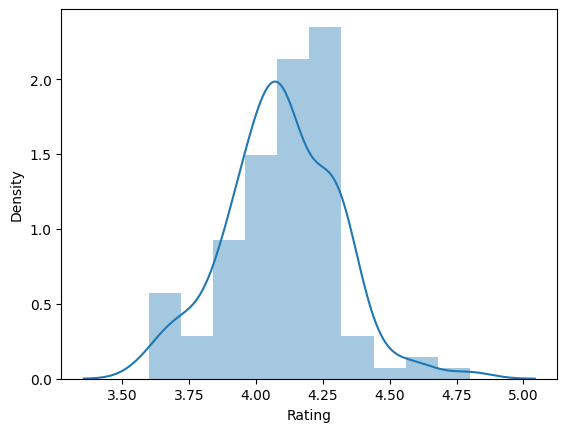

In [ ]:
#Distribution of 'Rating':
sns.distplot(df_valid_Ratings['Rating'])


***Conclusion:***
- From this **Distribution Plot**, We can conclude that ***More that '50%' of Restaurants*** are having a ***Rating*** greater than **"4.1"** with a ***Maximum Rating*** of **"4.8"** which is considered as a decent Rating.
- And It also means that, Most of these Restaurants are doing very well & Rated accordingly by the Customers.

In [ ]:
# Handling Feature --> Location
df_Swiggy['Location'].unique()

array(['Koramangala, Koramangala', 'Sector 5, HSR',
       '6th Block, Koramangala', 'HSR, HSR', '5th Block, Koramangala',
       'Koramangala 4th  Block, Koramangala', 'BTM 2nd Stage, BTM',
       'BTM, BTM', '9th Main road, Koramangala', 'outer ring road, BTM',
       '7th Block, Koramangala', '1st MAin, Koramangala',
       'Bommanahalli, BTM', '6th block, Koramangala', 'Sector 4, HSR',
       'BTM 1st stage, BTM', 'Jakkasandra Extn, Koramangala',
       'Marutinagar Main Road, BTM', '1st Block, Koramangala',
       '4th Cross, BTM', 'koramangala, Koramangala', 'BTM 2nd stage, BTM',
       '3rd main, BTM', 'HSR 1st sector, HSR', 'Sector 7, HSR',
       '3rd Sector, HSR', 'Chocolate Factory Road, BTM',
       '16th Main Road, 2nd Stage, BTM', '1st Stage, BTM',
       'Hosur Main Road, Koramangala',
       '1st Cross Road, 5th Block, Near Jyothi Nivas College, Koramangala',
       'Mico Layout, BTM', '4th Cross, Koramangala',
       '4th Block, Koramangala', 'Intermediate Ring Road, K

In [ ]:
df_Swiggy['Location'].nunique() # number of unique Locations

65

In [ ]:
# Locations that contains 'Koramangala'
swiggy_Koramangala = df_Swiggy[df_Swiggy['Location'].str.contains(r'Koramangala')]
swiggy_Koramangala

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two (₹)
0,Kanti Sweets,Sweets,"Koramangala, Koramangala",4.3,150
2,Sri Krishna sagar,"South Indian, North Indian, Fast Food, Beverag...","6th Block, Koramangala",4.1,126
4,Beijing Bites,"Chinese, Thai","5th Block, Koramangala",4.1,450
5,Kitchens of Punjab,North Indian,"Koramangala 4th Block, Koramangala",4.2,350
9,Yumlane Pizza,"Pizzas, Italian, Mexican","9th Main road, Koramangala",3.8,150
...,...,...,...,...,...
112,Kritunga,"Andhra, Biryani","5th Block, Koramangala",3.9,500
113,Wok Paper Scissors,"Pan-Asian, Chinese, Asian","JNC Road, Koramangala",3.9,219
115,Royal Treat,"North Indian, Chinese, Seafood, Biryani","5th block Koramangala, Koramangala",4.2,193
116,Thali 99,North Indian,"Koramangala, Koramangala",4.3,200


In [ ]:
# Locations that contains 'HSR'
swiggy_HSR = df_Swiggy[df_Swiggy['Location'].str.contains(r'HSR')]
swiggy_HSR

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two (₹)
1,Mumbai Tiffin,"North Indian, Home Food, Thalis, Combo","Sector 5, HSR",4.4,400
3,Al Daaz,"American, Arabian, Chinese, Desserts, Fast Foo...","HSR, HSR",4.4,400
8,Hotel Manu,"South Indian, Kerala, Chinese, North Indian","HSR, HSR",4.1,350
19,Shree Khana Khazana,"Indian, Rajasthani","Sector 4, HSR",4.1,350
24,New Udupi Grand,"Chinese, Jain, North Indian, South Indian","HSR, HSR",4.3,150
36,Biriyani Zone,"North Indian, Chinese, Biryani","HSR 1st sector, HSR",4.1,600
37,Gongura's,"North Indian, Chinese, Biryani","Sector 7, HSR",3.8,300
39,Leon Grill,"Turkish, Portuguese, American","3rd Sector, HSR",4.3,300
41,Cakewala,Desserts,"HSR, HSR",4.3,450
57,Donne Biriyani House,South Indian,"3rd sector, HSR",4.0,300


In [ ]:
# Locations that contains 'BTM'
swiggy_BTM = df_Swiggy[df_Swiggy['Location'].str.contains(r'BTM')]
swiggy_BTM

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two (₹)
6,99 VARIETY DOSA AND PAV BHAJI- Malli Mane Food...,"Fast Food, North Indian, Chinese","BTM 2nd Stage, BTM",4.1,200
7,La Pino'z Pizza,Italian,"BTM, BTM",3.9,500
10,Ambur Star Briyani,"Chinese, South Indian, North Indian, Desserts,...","outer ring road, BTM",4.1,500
17,Sri Lakshmi Dhaba,North Indian,"Bommanahalli, BTM",3.7,200
20,Just Bake - Cakes & confectioners,"Desserts, Bakery","BTM 1st stage, BTM",4.3,300
22,Hotel Godavari,"North Indian, Chinese, Hyderabadi","Marutinagar Main Road, BTM",4.0,400
25,Swad Punjab da,Indian,"BTM, BTM",4.1,250
27,High N Hungry,"Andhra, Biryani, Chinese, Desserts, Fast Food,...","4th Cross, BTM",4.1,350
31,Bengali Fun Foods,North Indian,"BTM 2nd stage, BTM",4.2,300
33,Oottupura,"Kerala, South Indian","BTM, BTM",4.3,268


As we can see the Returants are given from only 3 Locations.

## Area-wise Analysis -

#### BTM Area

<Axes: xlabel='Rating', ylabel='Count'>

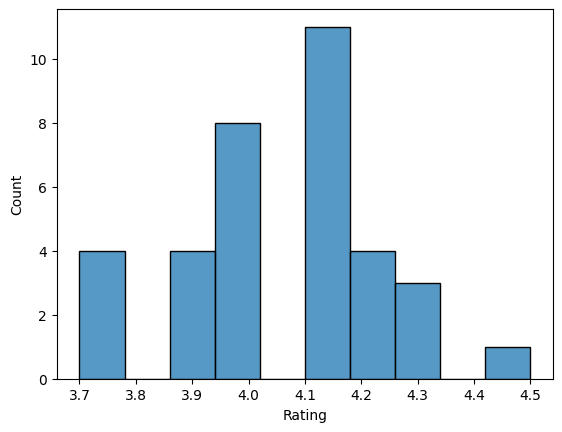

In [ ]:
sns.histplot(swiggy_BTM['Rating'], bins = 10)

<Axes: xlabel='Cost_for_Two (₹)', ylabel='Count'>

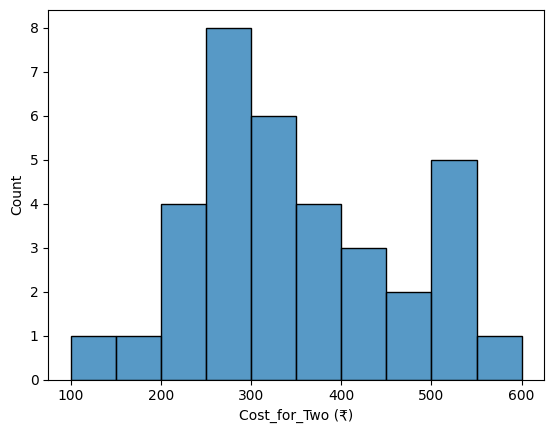

In [ ]:
sns.histplot(swiggy_BTM['Cost_for_Two (₹)'], bins = 10)

**Conclusion:**
* BTM : Most has 4.0 to 4.2 Rating and Approx. Cost for Two People lies between 200 to 350. (Max. Cost goes upto 600)

#### HSR Area

<Axes: xlabel='Rating', ylabel='Count'>

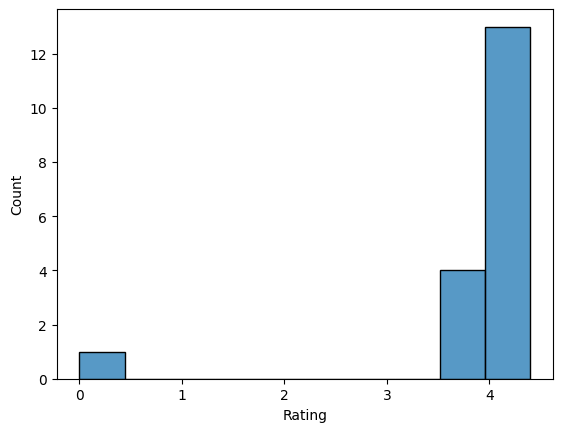

In [ ]:
sns.histplot(swiggy_HSR['Rating'], bins = 10)

<Axes: xlabel='Cost_for_Two (₹)', ylabel='Count'>

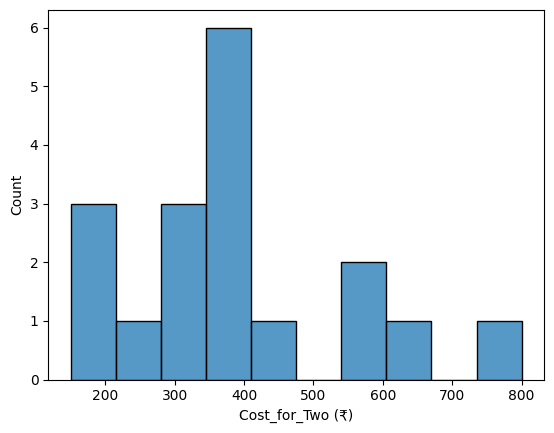

In [ ]:
sns.histplot(swiggy_HSR['Cost_for_Two (₹)'], bins = 10)

**Conclusion:**
* HSR : Most has 4 or above Rating and Approx. Cost for Two People lies between 300 to 400. (Max. Cost goes upto 800)

#### Koramangala Area

<Axes: xlabel='Rating', ylabel='Count'>

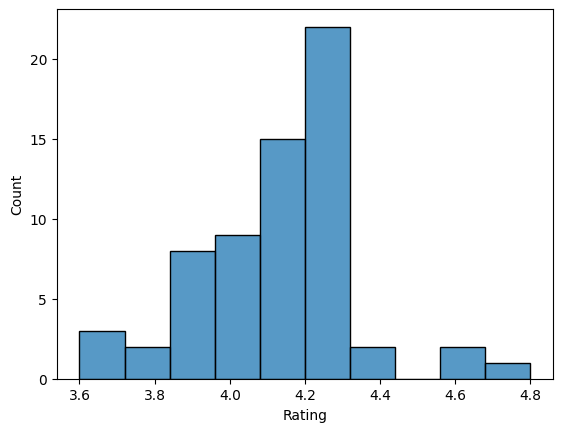

In [ ]:
sns.histplot(swiggy_Koramangala["Rating"], bins=10)

<Axes: xlabel='Cost_for_Two (₹)', ylabel='Count'>

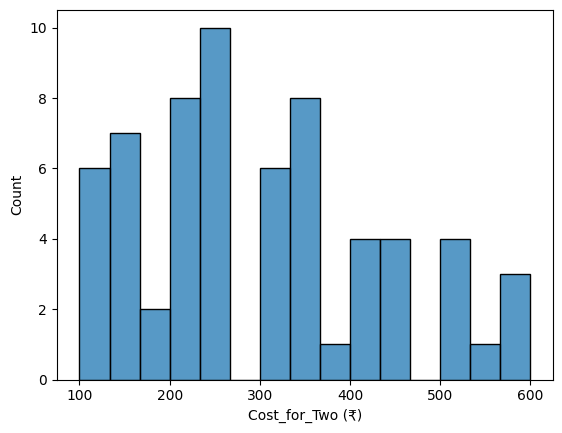

In [ ]:
sns.histplot(swiggy_Koramangala["Cost_for_Two (₹)"], bins=15)

**Conclusion:**
* Koramangala : Most has 4.0 to 4.3 Rating and Approx. Cost for Two People lies between 200 to 350. (Max. Cost goes upto 600)

#### Conclusion of Areawise Analysis
With this we can conclude the Most Costly Area is HSR.

In [ ]:
df_Swiggy.head()

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two (₹)
0,Kanti Sweets,Sweets,"Koramangala, Koramangala",4.3,150
1,Mumbai Tiffin,"North Indian, Home Food, Thalis, Combo","Sector 5, HSR",4.4,400
2,Sri Krishna sagar,"South Indian, North Indian, Fast Food, Beverag...","6th Block, Koramangala",4.1,126
3,Al Daaz,"American, Arabian, Chinese, Desserts, Fast Foo...","HSR, HSR",4.4,400
4,Beijing Bites,"Chinese, Thai","5th Block, Koramangala",4.1,450


In [ ]:
# Q. Analyse "Approx Cost of 2 People" vs "Rating". Find out the relationship between them.
df_Highest_Rated_Restaurants = df_Swiggy[df_Swiggy["Rating"] >= 4.0]
df_Highest_Rated_Restaurants

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two (₹)
0,Kanti Sweets,Sweets,"Koramangala, Koramangala",4.3,150
1,Mumbai Tiffin,"North Indian, Home Food, Thalis, Combo","Sector 5, HSR",4.4,400
2,Sri Krishna sagar,"South Indian, North Indian, Fast Food, Beverag...","6th Block, Koramangala",4.1,126
3,Al Daaz,"American, Arabian, Chinese, Desserts, Fast Foo...","HSR, HSR",4.4,400
4,Beijing Bites,"Chinese, Thai","5th Block, Koramangala",4.1,450
...,...,...,...,...,...
111,Bowl 99,"North Indian, South Indian","kormangala, Koramangala",4.4,200
114,Savoury Restaurant,"Arabian, Middle Eastern, North Indian, Grill, ...","Madiwala, BTM",4.1,600
115,Royal Treat,"North Indian, Chinese, Seafood, Biryani","5th block Koramangala, Koramangala",4.2,193
116,Thali 99,North Indian,"Koramangala, Koramangala",4.3,200


In [ ]:
df_Highest_Rated_Restaurants = df_Highest_Rated_Restaurants.loc[
    :, ["Shop_Name", "Rating", "Cost_for_Two (₹)"]
]
df_Highest_Rated_Restaurants

,Shop_Name,Rating,Cost_for_Two (₹)
0,Kanti Sweets,4.3,150
1,Mumbai Tiffin,4.4,400
2,Sri Krishna sagar,4.1,126
3,Al Daaz,4.4,400
4,Beijing Bites,4.1,450
...,...,...,...
111,Bowl 99,4.4,200
114,Savoury Restaurant,4.1,600
115,Royal Treat,4.2,193
116,Thali 99,4.3,200


In [ ]:
# Grouping on Shop_Name and Rating
df_Highest_Rated_Restaurants = df_Highest_Rated_Restaurants.groupby(
    ["Shop_Name", "Rating"]
)["Cost_for_Two (₹)"].agg("mean")
df_Highest_Rated_Restaurants = df_Highest_Rated_Restaurants.reset_index()
df_Highest_Rated_Restaurants

,Shop_Name,Rating,Cost_for_Two (₹)
0,99 VARIETY DOSA AND JUICE-Malli mane food court,4.1,100.0
1,99 VARIETY DOSA AND PAV BHAJI- Malli Mane Food...,4.1,200.0
2,A2B - Adyar Ananda Bhavan,4.2,450.0
3,Abhiruchi Hotel,4.0,250.0
4,Al Daaz,4.4,400.0
...,...,...,...
86,Venu's Donne Biryani,4.3,300.0
87,WarmOven Cake & Desserts,4.1,200.0
88,World of asia,4.0,250.0
89,XO Belgian Waffle,4.3,250.0


In [ ]:
fig = px.scatter(
    x=df_Highest_Rated_Restaurants["Cost_for_Two (₹)"],
    y=df_Highest_Rated_Restaurants["Rating"],
    color=df_Highest_Rated_Restaurants["Rating"],
    size=df_Highest_Rated_Restaurants["Cost_for_Two (₹)"],
    labels={
        "x": "Approx. Cost_for_Two (₹)",
        "y": "Rating",
        "color": "Rating_Indicator",
    },
)
fig.update_layout(
    template="plotly_dark",
    title="Analyse 'Approx Cost of 2 People' vs 'Rating'",
)
fig.show()

**Conclusion:**

- From this **'Scatter Plot'**, We can clearly say that - Bigger the Bubble, Higher the Price is... Similarly, Smaller the Bubble, Lesser the Price is...
- Furthermore, We can also say that, **_Most of the Affordable/Budgeted Restaurants_** are having **_Excellant Rating_** as well.
  - Same we can see, For **_Approx. Cost_** of **"200", "150", "250"**, and **"450"**, the **_Ratings_** were **"4.8", "4.6"**, and **"4.5"** respectively.
    - This might be because **_Most of the people prefer Affordable/Budget-Restaurants_** which also provides **_good quality_** of **_Cuisines_**.
- and On the other hand, There are **_few Expensive Restaurants_** who **_doesn't_** have that much **_Rating_** and they are **_Expensive_**.
  - **_Restaurants_** which **_Costs_** around **"600"** to **"800"** for **_Two People_** are having the **_Ratings in between '4.0' to '4.1'_** which is **_too less_** as compared to **_Affordable/Budgeted Restaurants_**.
- So, That's a Conclusion we can drawn from this **'Scatter Plot'**.


In [ ]:
##Q. Analyze Affordable/Budgeted and Highest Rated Restaurants of Bangalore:
df_Affordable_Restaurants = df_Swiggy[
    (df_Swiggy["Cost_for_Two (₹)"] <= 500) & (df_Swiggy["Rating"] >= 4.0)
]
df_Affordable_Restaurants

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two (₹)
0,Kanti Sweets,Sweets,"Koramangala, Koramangala",4.3,150
1,Mumbai Tiffin,"North Indian, Home Food, Thalis, Combo","Sector 5, HSR",4.4,400
2,Sri Krishna sagar,"South Indian, North Indian, Fast Food, Beverag...","6th Block, Koramangala",4.1,126
3,Al Daaz,"American, Arabian, Chinese, Desserts, Fast Foo...","HSR, HSR",4.4,400
4,Beijing Bites,"Chinese, Thai","5th Block, Koramangala",4.1,450
...,...,...,...,...,...
110,Biryani Pot,"North Indian, Biryani","Madiwala Junction, BTM",4.0,500
111,Bowl 99,"North Indian, South Indian","kormangala, Koramangala",4.4,200
115,Royal Treat,"North Indian, Chinese, Seafood, Biryani","5th block Koramangala, Koramangala",4.2,193
116,Thali 99,North Indian,"Koramangala, Koramangala",4.3,200


In [ ]:
df_Affordable_Restaurants = df_Affordable_Restaurants.groupby(
    ["Shop_Name", "Rating"]
)["Cost_for_Two (₹)"].agg("mean")
df_Affordable_Restaurants = df_Affordable_Restaurants.reset_index()
df_Affordable_Restaurants

,Shop_Name,Rating,Cost_for_Two (₹)
0,99 VARIETY DOSA AND JUICE-Malli mane food court,4.1,100.0
1,99 VARIETY DOSA AND PAV BHAJI- Malli Mane Food...,4.1,200.0
2,A2B - Adyar Ananda Bhavan,4.2,450.0
3,Abhiruchi Hotel,4.0,250.0
4,Al Daaz,4.4,400.0
...,...,...,...
76,Venu's Donne Biryani,4.3,300.0
77,WarmOven Cake & Desserts,4.1,200.0
78,World of asia,4.0,250.0
79,XO Belgian Waffle,4.3,250.0


In [ ]:
df_Affordable_Restaurants.sort_values(
    by=["Rating"], ascending=False, inplace=True
)
df_Affordable_Restaurants

,Shop_Name,Rating,Cost_for_Two (₹)
41,Khichdi Experiment,4.8,200.0
54,Natural Ice Cream,4.6,150.0
21,Corner House Ice Cream,4.6,250.0
20,Chinese Bae,4.5,450.0
50,Mumbai Tiffin,4.4,400.0
...,...,...,...
55,New Tasty Cafeteria,4.0,350.0
53,Nandhana Palace,4.0,500.0
52,Nanda's,4.0,400.0
45,Maa Di Hatti,4.0,129.0


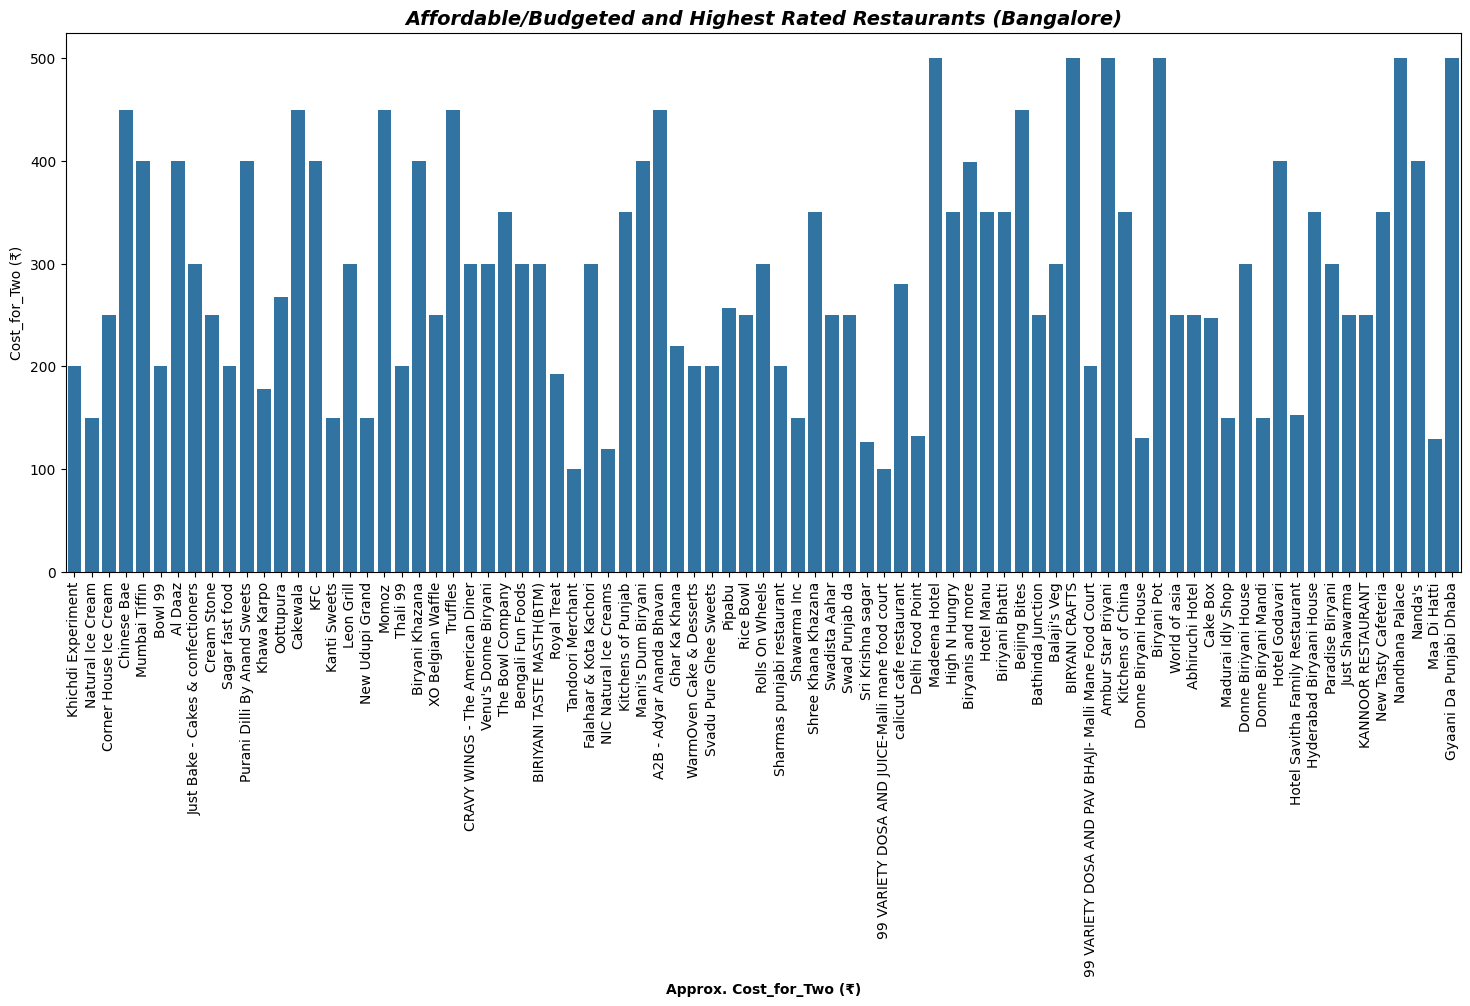

In [ ]:
plt.figure(figsize=(18, 7))
sns.barplot(
    x=df_Affordable_Restaurants["Shop_Name"],
    y=df_Affordable_Restaurants["Cost_for_Two (₹)"],
    data=df_Affordable_Restaurants,
)
plt.title(
    "Affordable/Budgeted and Highest Rated Restaurants (Bangalore)",
    fontsize=14,
    fontweight="bold",
    fontstyle="italic",
)
plt.xlabel("Shop_Name", fontsize=10, fontweight="bold")
plt.xlabel("Approx. Cost_for_Two (₹)", fontsize=10, fontweight="bold")
plt.xticks(rotation=90)
plt.show()



In [ ]:
# Q. Top 15 Cheapest & Highest Rated Restaurants with Approx. Cost for 2 People:
df_Cheapest_Restaurants = df_Affordable_Restaurants.sort_values(
    by="Cost_for_Two (₹)", ascending=True
)
df_Cheapest_Restaurants

,Shop_Name,Rating,Cost_for_Two (₹)
72,Tandoori Merchant,4.2,100.0
0,99 VARIETY DOSA AND JUICE-Malli mane food court,4.1,100.0
51,NIC Natural Ice Creams,4.2,120.0
68,Sri Krishna sagar,4.1,126.0
45,Maa Di Hatti,4.0,129.0
...,...,...,...
5,Ambur Star Briyani,4.1,500.0
7,BIRYANI CRAFTS,4.1,500.0
53,Nandhana Palace,4.0,500.0
46,Madeena Hotel,4.1,500.0


In [ ]:
fig = px.bar(
    data_frame=df_Cheapest_Restaurants,
    x=df_Cheapest_Restaurants["Shop_Name"][0:15],
    y=df_Cheapest_Restaurants["Cost_for_Two (₹)"][0:15],
    color=df_Cheapest_Restaurants["Rating"][0:15],
    labels={
        "x": "Restaurant_Name",
        "y": "Approx. Cost_for_Two (₹)",
        "color": "Rating",
    },
)
fig.update_layout(
    template="plotly_dark",
    title="Top 15 Cheapest & Highest Rated Restaurants with Approx. Cost for 2 People",
)
fig.show()

In [ ]:
# Q. Top 15 Expensive & Highest Rated Restaurants with Approx. Cost for 2 People:
df_Expensive_Restaurants = df_Highest_Rated_Restaurants.sort_values(
    by="Cost_for_Two (₹)", ascending=False
)
df_Expensive_Restaurants

,Shop_Name,Rating,Cost_for_Two (₹)
67,Punjabi Rasoi,4.0,800.0
26,Dindigul Thalapakatti Biriyani,4.1,650.0
73,Savoury Restaurant,4.1,600.0
81,Taco Bell,4.3,600.0
66,Pizza Hut,4.0,600.0
...,...,...,...
49,Maa Di Hatti,4.0,129.0
77,Sri Krishna sagar,4.1,126.0
56,NIC Natural Ice Creams,4.2,120.0
82,Tandoori Merchant,4.2,100.0


In [ ]:
fig = px.bar(
    data_frame=df_Expensive_Restaurants,
    x=df_Expensive_Restaurants["Shop_Name"][0:15],
    y=df_Expensive_Restaurants["Cost_for_Two (₹)"][0:15],
    color=df_Expensive_Restaurants["Rating"][0:15],
    labels={
        "x": "Restaurant_Name",
        "y": "Approx. Cost_for_Two (₹)",
        "color": "Rating",
    },
)
fig.update_layout(
    template="plotly_dark",
    title="Top 15 Expensive & Highest Rated Restaurants with Approx. Cost for 2 People",
)
fig.show()

# Cuisine Analysis:

In [ ]:
df_Swiggy["Cuisine"] = df_Swiggy["Cuisine"].str.title()
df_Swiggy["Cuisine"]

0                                                 Sweets
1                 North Indian, Home Food, Thalis, Combo
2      South Indian, North Indian, Fast Food, Beverag...
3      American, Arabian, Chinese, Desserts, Fast Foo...
4                                          Chinese, Thai
                             ...                        
113                            Pan-Asian, Chinese, Asian
114    Arabian, Middle Eastern, North Indian, Grill, ...
115              North Indian, Chinese, Seafood, Biryani
116                                         North Indian
117                                      Andhra, Biryani
Name: Cuisine, Length: 118, dtype: object

In [ ]:
df_Swiggy["Cuisine"].unique()

array(['Sweets', 'North Indian, Home Food, Thalis, Combo',
       'South Indian, North Indian, Fast Food, Beverages, Jain',
       'American, Arabian, Chinese, Desserts, Fast Food, Mughlai, North Indian',
       'Chinese, Thai', 'North Indian',
       'Fast Food, North Indian, Chinese', 'Italian',
       'South Indian, Kerala, Chinese, North Indian',
       'Pizzas, Italian, Mexican',
       'Chinese, South Indian, North Indian, Desserts, Fast Food, Kerala, Andhra, Beverages, Mughlai, Seafood',
       'Desserts', 'Chinese, Andhra, Biryani, Seafood', 'Chinese',
       'South Indian, Chinese, Desserts, North Indian',
       'Arabian, Fast Food', 'Desserts, Beverages', 'Indian, Rajasthani',
       'Desserts, Bakery', 'Chinese, Healthy Food, North Indian',
       'North Indian, Chinese, Hyderabadi', 'Fast Food',
       'Chinese, Jain, North Indian, South Indian', 'Indian',
       'North Indian, South Indian, Chinese',
       'Andhra, Biryani, Chinese, Desserts, Fast Food, Seafood, South In

In [ ]:
freq_dict = {}
for i in df_Swiggy["Cuisine"].unique():
    Cuisines_Lists = i.split(",")
    for Cuisine in Cuisines_Lists:
        Cuisine = Cuisine.lstrip(" ")
        if Cuisine in freq_dict:
            freq_dict[Cuisine] = freq_dict[Cuisine] + 1
        else:
            freq_dict[Cuisine] = 1

print(freq_dict)
print()
print("Total Records: \t", len(freq_dict))

{'Sweets': 2, 'North Indian': 32, 'Home Food': 2, 'Thalis': 1, 'Combo': 1, 'South Indian': 23, 'Fast Food': 16, 'Beverages': 9, 'Jain': 2, 'American': 8, 'Arabian': 4, 'Chinese': 35, 'Desserts': 15, 'Mughlai': 7, 'Thai': 2, 'Italian': 4, 'Kerala': 6, 'Pizzas': 5, 'Mexican': 3, 'Andhra': 12, 'Seafood': 8, 'Biryani': 18, 'Indian': 5, 'Rajasthani': 1, 'Bakery': 2, 'Healthy Food': 4, 'Hyderabadi': 5, 'Snacks': 4, 'Turkish': 2, 'Portuguese': 2, 'Chaat': 2, 'Asian': 3, 'Continental': 3, 'Mediterranean': 1, 'Lebanese': 1, 'Cafe': 2, 'Salads': 2, 'Pastas': 1, 'Punjabi': 2, 'Juices': 2, 'Kebabs': 2, 'Grill': 2, 'Ice Cream': 2, 'Tandoor': 1, 'Chettinad': 2, 'Pan-Asian': 2, 'Oriental': 1, 'Middle Eastern': 1}

Total Records: 	 48


Here you can see the different types of cusine present and the number of shops sell them


In [ ]:
# Extracting Cuisines name and there frequency
Cuisine = freq_dict.keys()
freq = freq_dict.values()


df_Cuisine_Analysis = pd.DataFrame()

# Creating a dataframe having two feature --> Cuisine and Count
df_Cuisine_Analysis["Cuisine"] = Cuisine
df_Cuisine_Analysis["Count"] = freq

df_Cuisine_Analysis

,Cuisine,Count
0,Sweets,2
1,North Indian,32
2,Home Food,2
3,Thalis,1
4,Combo,1
5,South Indian,23
6,Fast Food,16
7,Beverages,9
8,Jain,2
9,American,8


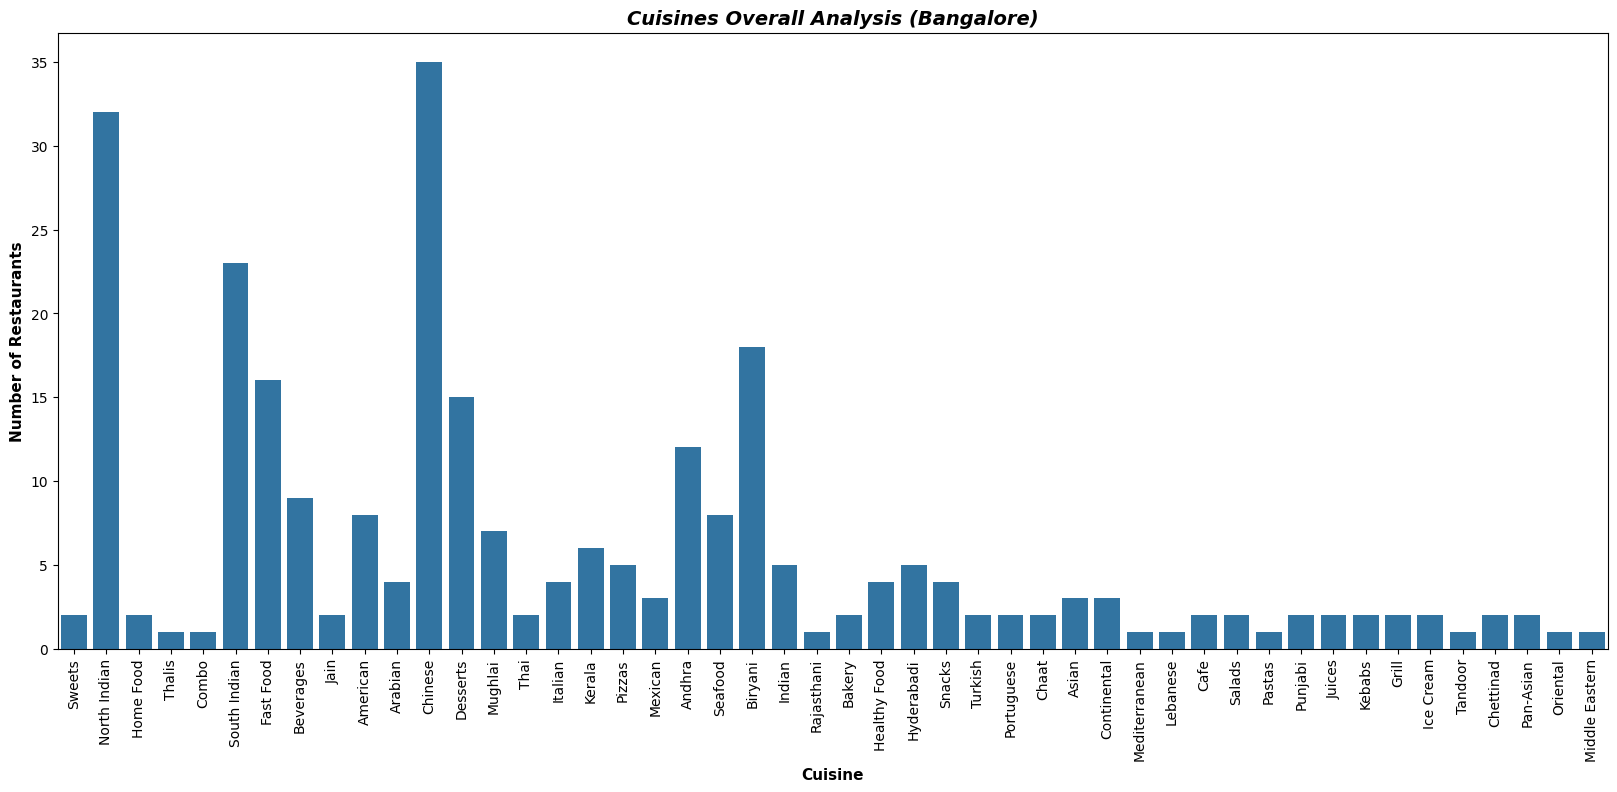

In [ ]:
plt.figure(figsize=(20, 8))
sns.barplot(
    x=df_Cuisine_Analysis["Cuisine"],
    y=df_Cuisine_Analysis["Count"],
    data=df_Cuisine_Analysis,
)
plt.xticks(rotation=90)
plt.title(
    "Cuisines Overall Analysis (Bangalore)",
    fontsize=14,
    fontweight="bold",
    fontstyle="italic",
)
plt.xlabel("Cuisine", fontsize=11, fontweight="bold")
plt.ylabel("Number of Restaurants", fontsize=11, fontweight="bold")
plt.show()

In [ ]:
fig = px.pie(
    data_frame=df_Cuisine_Analysis,
    names=df_Cuisine_Analysis["Cuisine"],
    values = df_Cuisine_Analysis["Count"],
    title="Distribution of Cuisines in Bangalore Restaurants"

)
fig.update_traces(textposition="inside", textinfo="percent+label")
fig.show()


**Conclusion:**

- From the above Visualizations, We can say, **_Most of the Resturants_** sell **"Chinese"** which is around **'12.9%'** followed by **"North Indian"** & **"South Indian"** Cuisines which are around **'11.8%'** & **'8.46%'**.
- So, We can also infer that Most of the people are fond of these Cusines.

## Area-wise Analysis:

**BTM Area**

In [ ]:
swiggy_BTM["Cuisine"].unique()

array(['Fast Food, North Indian, Chinese', 'Italian',
       'Chinese, South Indian, North Indian, Desserts, Fast Food, Kerala, Andhra, Beverages, Mughlai, Seafood',
       'North Indian', 'Desserts, Bakery',
       'North Indian, Chinese, Hyderabadi', 'Indian',
       'Andhra, Biryani, Chinese, Desserts, Fast Food, Seafood, South Indian',
       'Kerala, South Indian', 'North Indian, Chinese, Biryani',
       'Biryani', 'South Indian, Snacks, North Indian, Chinese',
       'Desserts, Fast Food, Sweets, Chaat',
       'Chinese, South Indian, Andhra, Hyderabadi',
       'North Indian, Chinese, South Indian',
       'Biryani, Andhra, South Indian', 'Fast Food, Beverages',
       'Beverages, Chinese', 'Kerala, Chinese', 'North Indian, Chinese',
       'Arabian, Beverages, Biryani, Chinese, Desserts, North Indian',
       'North Indian, South Indian', 'Chinese, Thai',
       'Chinese, Hyderabadi, Biryani, Indian, South Indian, Andhra, Tandoor',
       'Punjabi, North Indian, Chinese, Fast 

In [ ]:
freq_BTM = {}
for i in swiggy_BTM["Cuisine"].unique():
    Cuisine_List = i.split(",")
    for Cuisine in Cuisine_List:
        Cuisine = Cuisine.lstrip()
        if Cuisine in freq_BTM:
            freq_BTM[Cuisine] = freq_BTM[Cuisine] + 1
        else:
            freq_BTM[Cuisine] = 1

print(freq_BTM)
print()
print(len(freq_BTM))


{'Fast Food': 6, 'North Indian': 16, 'Chinese': 18, 'Italian': 1, 'South Indian': 10, 'Desserts': 6, 'Kerala': 4, 'Andhra': 7, 'Beverages': 4, 'Mughlai': 3, 'Seafood': 3, 'Bakery': 1, 'Hyderabadi': 4, 'Indian': 2, 'Biryani': 8, 'Snacks': 1, 'Sweets': 1, 'Chaat': 1, 'Arabian': 2, 'Thai': 1, 'Tandoor': 1, 'Punjabi': 1, 'Healthy Food': 1, 'Chettinad': 1, 'Middle Eastern': 1, 'Grill': 1}

26


In [ ]:
Cuisine = freq_BTM.keys()
freq = freq_BTM.values()

dict_BTM = {"Cuisine": Cuisine, "Count": freq}

df_Cuisine_BTM = pd.DataFrame(dict_BTM)
df_Cuisine_BTM.head()


,Cuisine,Count
0,Fast Food,6
1,North Indian,16
2,Chinese,18
3,Italian,1
4,South Indian,10


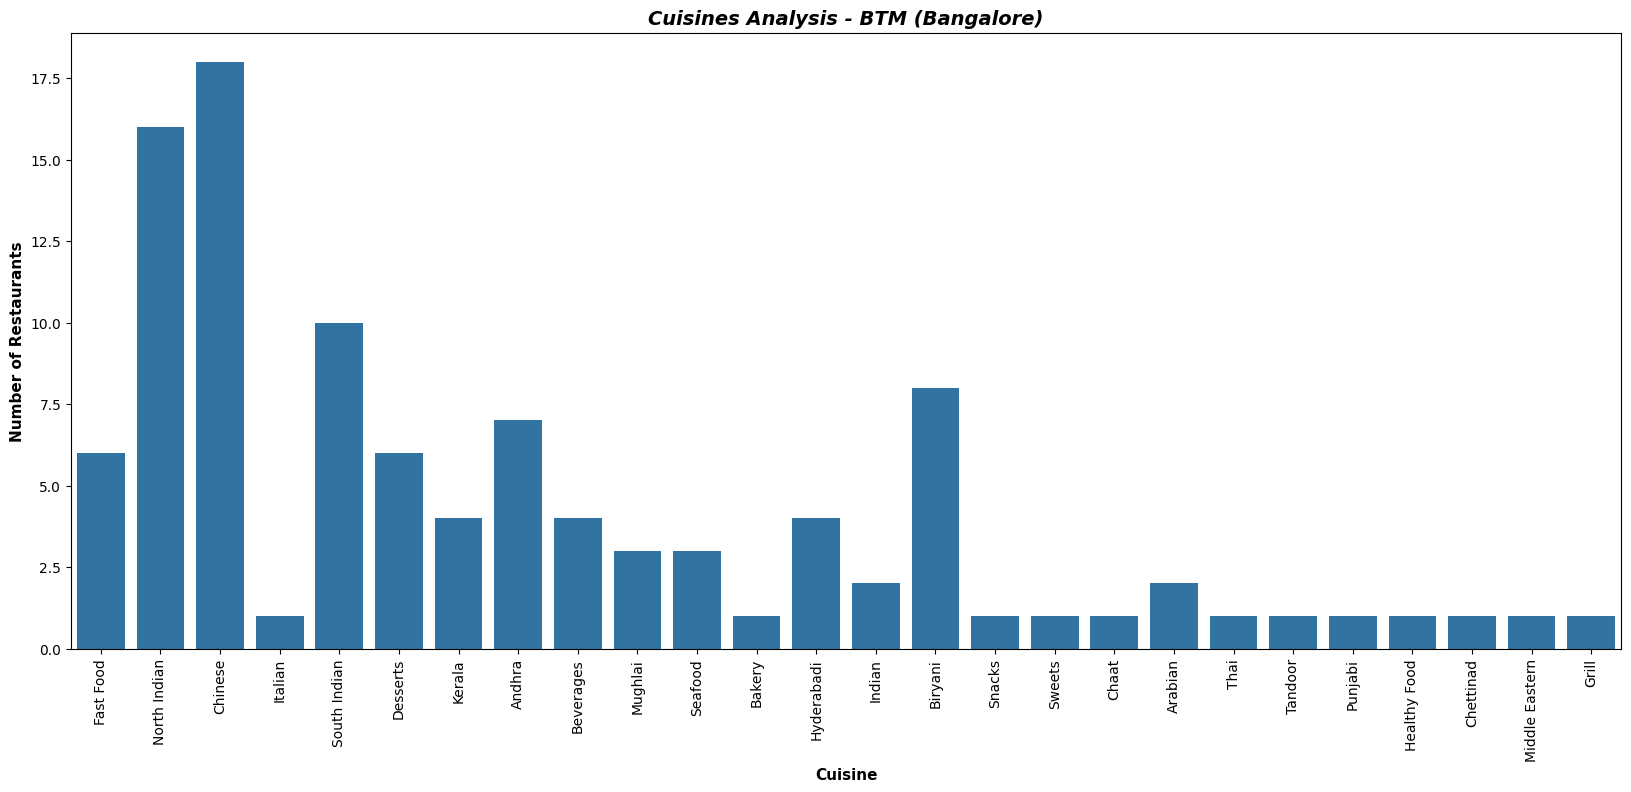

In [ ]:
plt.figure(figsize=(20, 8))
sns.barplot(
    x=df_Cuisine_BTM["Cuisine"], y=df_Cuisine_BTM["Count"], data=df_Cuisine_BTM
)

plt.xticks(rotation=90)

plt.title(
    "Cuisines Analysis - BTM (Bangalore)",
    fontsize=14,
    fontweight="bold",
    fontstyle="italic",
)
plt.xlabel("Cuisine", fontsize=11, fontweight="bold")
plt.ylabel("Number of Restaurants", fontsize=11, fontweight="bold")
plt.show()

In [ ]:
fig = px.pie(
    data_frame=df_Cuisine_BTM,
    names=df_Cuisine_BTM["Cuisine"],
    values=df_Cuisine_BTM["Count"],
    title="Distribution of Cuisines in BTM Bangalore Restaurants",
)

fig.update_traces(textposition="inside", textinfo="percent+label")
fig.show()

**Conclusion:**

- From the above Visualizations, We can say, In **BTM** Area, **_Most of the Resturants_** sell **"Chinese"** which is around **'17.1%'** followed by **"North Indian"** & **"South Indian"** Cuisines which are around **'15.2%'** & **'9.52%'**.
- So, We can also infer that Most of the people are fond of these Cusines.


**HSR Area**

In [ ]:
swiggy_HSR["Cuisine"].unique()


array(['North Indian, Home Food, Thalis, Combo',
       'American, Arabian, Chinese, Desserts, Fast Food, Mughlai, North Indian',
       'South Indian, Kerala, Chinese, North Indian',
       'Indian, Rajasthani', 'Chinese, Jain, North Indian, South Indian',
       'North Indian, Chinese, Biryani', 'Turkish, Portuguese, American',
       'Desserts', 'South Indian', 'Andhra, Biryani', 'Desserts, Bakery',
       'Biryani, Juices, Kebabs', 'North Indian', 'Biryani',
       'Snacks, American', 'Chettinad, South Indian'], dtype=object)

In [ ]:
freq_HSR = {}
for i in swiggy_HSR["Cuisine"].unique():
    Cuisine_List = i.split(",")
    for Cuisine in Cuisine_List:
        Cuisine = Cuisine.lstrip()
        if Cuisine in freq_HSR:
            freq_HSR[Cuisine] = freq_HSR[Cuisine] + 1
        else:
            freq_HSR[Cuisine] = 1

print(freq_HSR)
print()
print(len(freq_HSR))

{'North Indian': 6, 'Home Food': 1, 'Thalis': 1, 'Combo': 1, 'American': 3, 'Arabian': 1, 'Chinese': 4, 'Desserts': 3, 'Fast Food': 1, 'Mughlai': 1, 'South Indian': 4, 'Kerala': 1, 'Indian': 1, 'Rajasthani': 1, 'Jain': 1, 'Biryani': 4, 'Turkish': 1, 'Portuguese': 1, 'Andhra': 1, 'Bakery': 1, 'Juices': 1, 'Kebabs': 1, 'Snacks': 1, 'Chettinad': 1}

24


In [ ]:
Cuisine = freq_HSR.keys()
freq = freq_HSR.values()

dict_HSR = {"Cuisine": Cuisine, "Count": freq}

df_Cuisine_HSR = pd.DataFrame(dict_HSR)
df_Cuisine_HSR.head()


,Cuisine,Count
0,North Indian,6
1,Home Food,1
2,Thalis,1
3,Combo,1
4,American,3


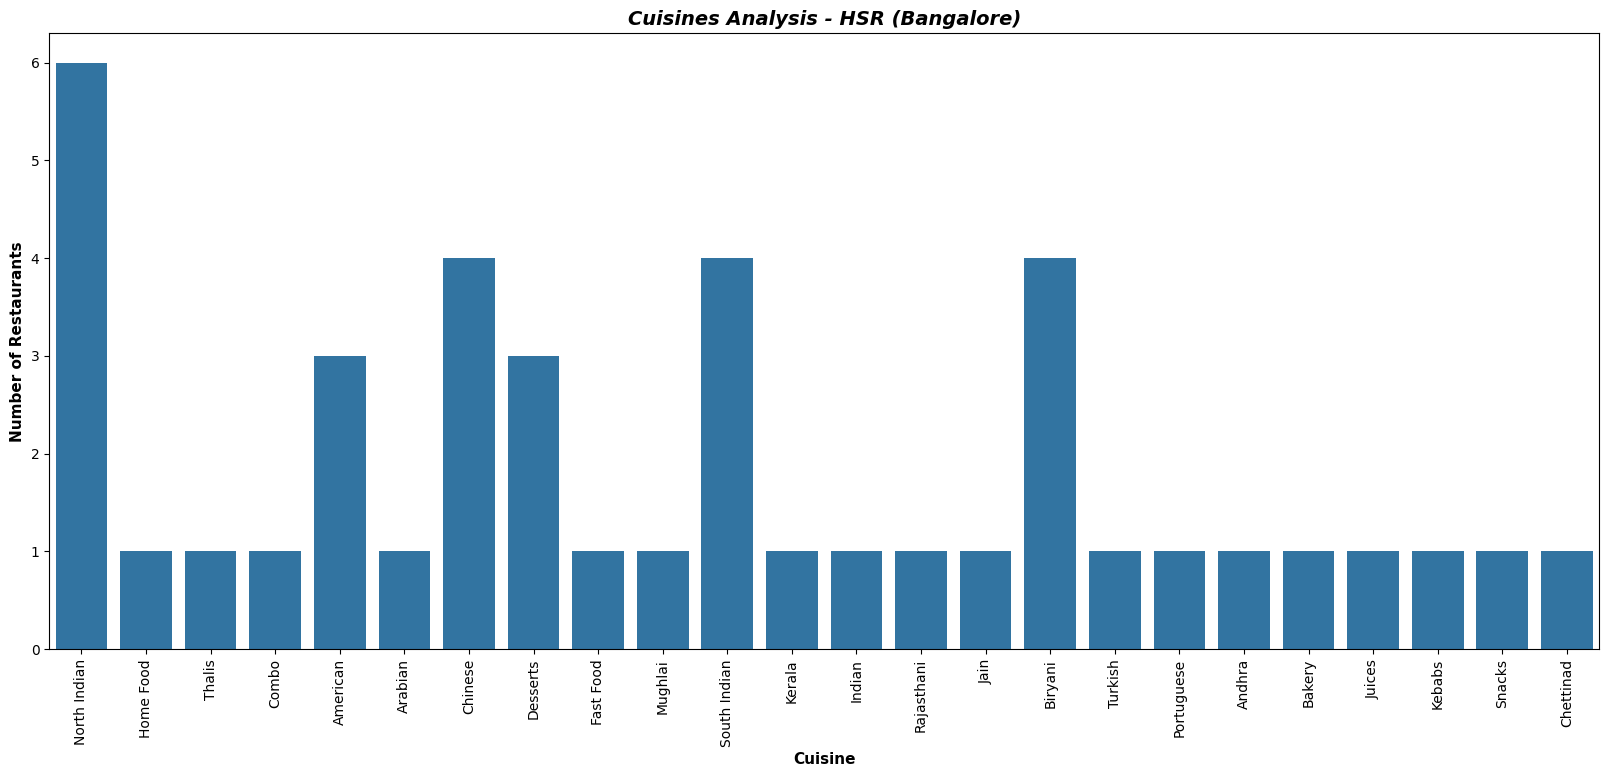

In [ ]:
plt.figure(figsize=(20, 8))
sns.barplot(
    x=df_Cuisine_HSR["Cuisine"], y=df_Cuisine_HSR["Count"], data=df_Cuisine_HSR
)

plt.xticks(rotation=90)

plt.title(
    "Cuisines Analysis - HSR (Bangalore)",
    fontsize=14,
    fontweight="bold",
    fontstyle="italic",
)
plt.xlabel("Cuisine", fontsize=11, fontweight="bold")
plt.ylabel("Number of Restaurants", fontsize=11, fontweight="bold")
plt.show()

In [ ]:
fig = px.pie(
    data_frame=df_Cuisine_HSR,
    names=df_Cuisine_HSR["Cuisine"],
    values=df_Cuisine_HSR["Count"],
    title="Distribution of Cuisines in HSR Bangalore Restaurants",
)

fig.update_traces(textposition="inside", textinfo="percent+label")
fig.show()

**Koramangala Area**

In [ ]:
swiggy_Koramangala["Cuisine"].unique()

array(['Sweets', 'South Indian, North Indian, Fast Food, Beverages, Jain',
       'Chinese, Thai', 'North Indian', 'Pizzas, Italian, Mexican',
       'Desserts', 'Chinese, Andhra, Biryani, Seafood', 'Chinese',
       'South Indian, Chinese, Desserts, North Indian',
       'Arabian, Fast Food', 'Desserts, Beverages',
       'Chinese, Healthy Food, North Indian', 'Fast Food',
       'North Indian, South Indian, Chinese', 'American, Fast Food',
       'Biryani, Seafood, North Indian, Chinese, Desserts, Andhra, South Indian',
       'Snacks, American', 'South Indian', 'Mexican', 'Pizzas, Fast Food',
       'Biryani, Mughlai, South Indian', 'Chinese, Asian',
       'Italian, Desserts, Pizzas',
       'Chinese, Continental, Italian, Mediterranean, Thai, Lebanese, American, Asian, Beverages, Bakery, Biryani, Cafe, Desserts, Healthy Food, Mexican, North Indian, Salads, Pizzas',
       'Biryani',
       'Pizzas, Chinese, Pastas, Salads, American, Continental',
       'Chinese, South Indian, Nor

In [ ]:
freq_Koramangala = {}
for i in swiggy_Koramangala["Cuisine"].unique():
    Cuisine_List = i.split(",")
    for Cuisine in Cuisine_List:
        Cuisine = Cuisine.lstrip()
        if Cuisine in freq_Koramangala:
            freq_Koramangala[Cuisine] = freq_Koramangala[Cuisine] + 1
        else:
            freq_Koramangala[Cuisine] = 1

print(freq_Koramangala)
print()
print(len(freq_Koramangala))


{'Sweets': 1, 'South Indian': 11, 'North Indian': 14, 'Fast Food': 9, 'Beverages': 5, 'Jain': 1, 'Chinese': 15, 'Thai': 2, 'Pizzas': 5, 'Italian': 4, 'Mexican': 3, 'Desserts': 8, 'Andhra': 5, 'Biryani': 10, 'Seafood': 5, 'Arabian': 1, 'Healthy Food': 3, 'American': 6, 'Snacks': 3, 'Mughlai': 3, 'Asian': 3, 'Continental': 3, 'Mediterranean': 1, 'Lebanese': 1, 'Bakery': 1, 'Cafe': 2, 'Salads': 2, 'Pastas': 1, 'Punjabi': 1, 'Hyderabadi': 1, 'Kerala': 1, 'Turkish': 1, 'Portuguese': 1, 'Grill': 1, 'Home Food': 1, 'Indian': 2, 'Ice Cream': 2, 'Juices': 1, 'Chaat': 1, 'Kebabs': 1, 'Pan-Asian': 2, 'Oriental': 1}

42


In [ ]:
Cuisine = freq_Koramangala.keys()
freq = freq_Koramangala.values()

dict_Koramangala = {"Cuisine": Cuisine, "Count": freq}

df_Cuisine_Koramangala = pd.DataFrame(dict_Koramangala)
df_Cuisine_Koramangala.head()

,Cuisine,Count
0,Sweets,1
1,South Indian,11
2,North Indian,14
3,Fast Food,9
4,Beverages,5


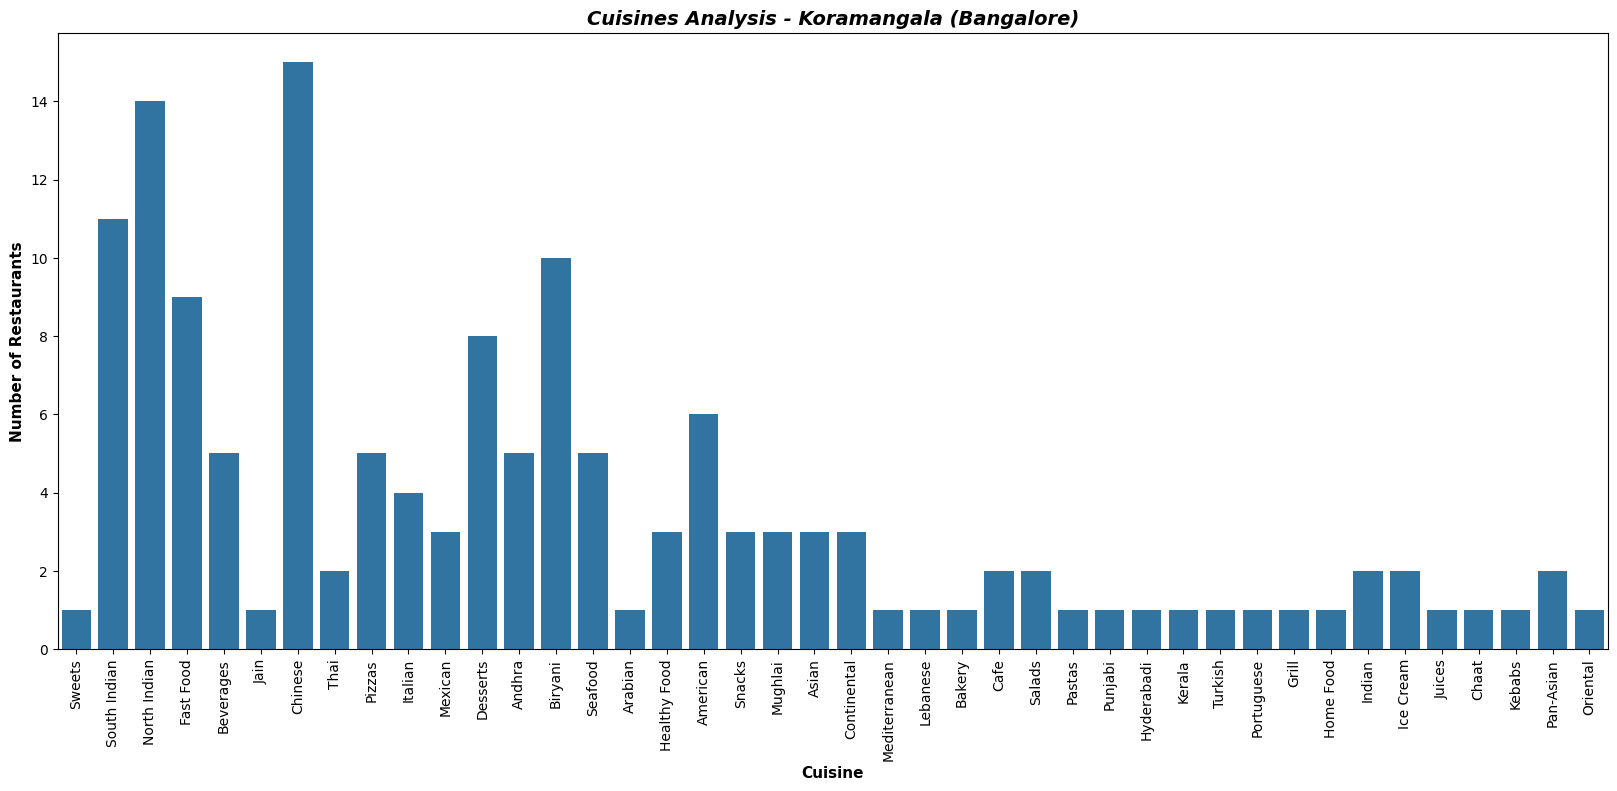

In [ ]:
plt.figure(figsize=(20, 8))
sns.barplot(
    x=df_Cuisine_Koramangala["Cuisine"],
    y=df_Cuisine_Koramangala["Count"],
    data=df_Cuisine_Koramangala,
)

plt.xticks(rotation=90)

plt.title(
    "Cuisines Analysis - Koramangala (Bangalore)",
    fontsize=14,
    fontweight="bold",
    fontstyle="italic",
)
plt.xlabel("Cuisine", fontsize=11, fontweight="bold")
plt.ylabel("Number of Restaurants", fontsize=11, fontweight="bold")
plt.show()

In [ ]:
fig = px.pie(
    data_frame=df_Cuisine_Koramangala,
    names=df_Cuisine_Koramangala["Cuisine"],
    values=df_Cuisine_Koramangala["Count"],
    title="Distribution of Cuisines in Koramangala Bangalore Restaurants",
)

fig.update_traces(textposition="inside", textinfo="percent+label")
fig.show()


**Conclusion:**

- From the above Visualizations, We can say, In **Koramangala** Area, **"Chinese"** Cuisines are dominated by around **'10.3%'** followed by **"North Indian"** & **"South Indian"** Cuisines **'9.66%'** & **'7.59%'** Restaurants respectively.
- So, We can also infer that Most of the people are fond of the **"Chinese"** Cuisines.
